In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [72]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

In [4]:
df = pd.read_excel('1730285881-Airbnb_Open_Data.xlsx')

In [6]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [8]:
df.describe()

,id,host id,lat,long,instant_bookable,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102494.000000,102385.000000,102352.000000,102326.000000,102190.000000,102416.000000,86706,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,0.497785,2012.487464,625.293536,125.026924,8.135845,27.483743,2019-06-12 03:40:52.065601024,1.374022,3.279106,7.936605,141.133254
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,0.000000,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,0.000000,2007.000000,340.000000,68.000000,2.000000,1.000000,2018-10-28 00:00:00,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,0.000000,2012.000000,624.000000,125.000000,3.000000,7.000000,2019-06-14 00:00:00,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,1.000000,2017.000000,913.000000,183.000000,5.000000,30.000000,2019-07-05 00:00:00,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.625751e+07,2.853900e+10,0.055857,0.049521,0.499998,5.765556,331.671614,66.325739,30.553781,49.508954,NaN,1.746621,1.284657,32.218780,135.435024


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [12]:
df.duplicated().value_counts()

False    102058
True        541
Name: count, dtype: int64

In [14]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [16]:
for col in df.columns:
    print(df[col].duplicated().value_counts())

id
False    102058
True        541
Name: count, dtype: int64
NAME
False    61281
True     41318
Name: count, dtype: int64
host id
False    102057
True        542
Name: count, dtype: int64
host_identity_verified
True     102596
False         3
Name: count, dtype: int64
host name
True     89409
False    13190
Name: count, dtype: int64
neighbourhood group
True     102591
False         8
Name: count, dtype: int64
neighbourhood
True     102374
False       225
Name: count, dtype: int64
lat
True     80607
False    21992
Name: count, dtype: int64
long
True     84824
False    17775
Name: count, dtype: int64
country
True     102597
False         2
Name: count, dtype: int64
country code
True     102597
False         2
Name: count, dtype: int64
instant_bookable
True     102596
False         3
Name: count, dtype: int64
cancellation_policy
True     102595
False         4
Name: count, dtype: int64
room type
True     102595
False         4
Name: count, dtype: int64
Construction year
True     102578
Fa

In [18]:
df.loc[df['NAME'].duplicated()]

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,212.0,45.0,49.0,2017-10-05,0.40,5.0,1.0,219.0,House Guidelines for our BnB We are delighted ...,NaN
57,1032817,NaN,18424415847,unconfirmed,Carina,Manhattan,Lower East Side,40.72004,-73.99104,United States,...,205.0,5.0,19.0,2019-05-18,0.17,4.0,1.0,NaN,NaN,NaN
58,1033369,NaN,48877238684,NaN,Sophia,Manhattan,Hell's Kitchen,40.75531,-73.99293,United States,...,132.0,2.0,289.0,2019-06-09,2.49,3.0,2.0,NaN,NaN,NaN
59,1033922,NaN,71987706184,verified,Rosie,Brooklyn,Greenpoint,40.72401,-73.93788,United States,...,109.0,4.0,138.0,2019-06-04,1.19,1.0,3.0,NaN,No smoking.,NaN
60,1034474,NaN,85649449746,verified,Frederick,Manhattan,SoHo,40.72210,-73.99775,United States,...,51.0,30.0,21.0,2019-06-29,0.30,5.0,1.0,NaN,Quietly please. I am on the top floor and hav...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,169.0,1.0,0.0,NaT,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,167.0,1.0,1.0,2015-07-06,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,198.0,3.0,0.0,NaT,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,109.0,2.0,5.0,2015-10-11,0.10,3.0,1.0,386.0,NaN,NaN


In [20]:
df.isnull().sum()

id                                     0
NAME                                 270
host id                                0
host_identity_verified               289
host name                            408
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [22]:
df.drop_duplicates(inplace = True)
df.drop(['house_rules', 'license'],axis = 1,inplace = True)
df = df.drop(df[df['availability 365'] > 500].index)

In [24]:
df['NAME'].dropna().reset_index()

,index,NAME
0,0,Clean & quiet apt home by the park
1,1,Skylit Midtown Castle
2,2,THE VILLAGE OF HARLEM....NEW YORK !
3,4,Entire Apt: Spacious Studio/Loft by central park
4,5,Large Cozy 1 BR Apartment In Midtown East
...,...,...
101782,102053,Cozy bright room near Prospect Park
101783,102054,Private Bedroom with Amazing Rooftop View
101784,102055,Pretty Brooklyn One-Bedroom for 2 to 4 people
101785,102056,Room & private bathroom in historic Harlem


# EDA

In [27]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
id,102057.0,29184269.245765,1001254.0,15092718.0,29184100.0,43276035.0,57367417.0,16271768.777224
host id,102057.0,49267286523.195801,123600518.0,24599160013.0,49128110819.0,74006355414.0,98763129024.0,28537539283.199833
lat,102049.0,40.728097,40.49979,40.68873,40.72229,40.76276,40.91697,0.055852
long,102049.0,-73.949652,-74.24984,-73.98258,-73.95444,-73.93235,-73.70522,0.049502
instant_bookable,101952.0,0.49794,0.0,0.0,0.0,1.0,1.0,0.499998
Construction year,101843.0,2012.488124,2003.0,2007.0,2012.0,2017.0,2022.0,5.765855
price,101810.0,625.350074,50.0,340.0,624.5,913.0,1200.0,331.669624
service fee,101784.0,125.038149,10.0,68.0,125.0,183.0,240.0,66.325303
minimum nights,101657.0,8.126691,-1223.0,2.0,3.0,5.0,5645.0,30.616844
number of reviews,101874.0,27.515941,0.0,1.0,7.0,31.0,1024.0,49.567848


# Answering the queries

## 1. What are the different property types in dataset

In [31]:
df['room type'].value_counts()

room type
Entire home/apt    53428
Private room       46306
Shared room         2208
Hotel room           115
Name: count, dtype: int64

## 2.which neighbour group has the highest number of listings

In [46]:
neighbour_hood = df['neighbourhood group'].value_counts().to_frame()
neighbour_hood

,count
neighbourhood group,
Manhattan,43556
Brooklyn,41630
Queens,13197
Bronx,2694
Staten Island,949
brookln,1
manhatan,1


<Axes: xlabel='neighbourhood group', ylabel='count'>

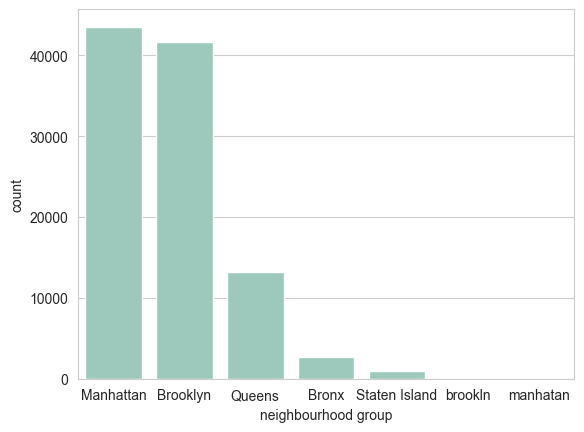

In [74]:
sns.barplot(x= neighbour_hood.index,y = neighbour_hood['count'])

### Hence manhattan has most number of listings

## 3.Which neighbourhood group has the highest avg prices for Airbnb listings?

In [84]:
avg_price = df.groupby("neighbourhood group")['price'].mean().sort_values(ascending = False).to_frame()
avg_price

,price
neighbourhood group,
Queens,630.217031
Bronx,627.764793
Brooklyn,626.501962
Staten Island,623.990486
Manhattan,622.637964
brookln,580.000000
manhatan,460.000000


<Axes: xlabel='neighbourhood group', ylabel='price'>

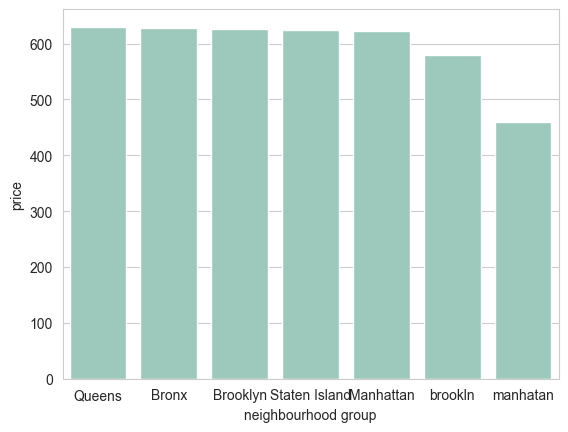

In [86]:
sns.barplot(x = avg_price.index,y = avg_price['price'])

## Here we can see that Queens has highest avg prices

# 4.Is there a relationship between the construction year of property and price?

In [96]:
con_rel = df.groupby(df['Construction year'])['price'].mean().to_frame()
con_rel

,price
Construction year,
2003.0,623.282681
2004.0,630.038639
2005.0,620.240079
2006.0,634.960773
2007.0,626.194444
2008.0,638.667374
2009.0,618.499903
2010.0,626.627271
2011.0,627.247708


<Axes: xlabel='Construction year', ylabel='price'>

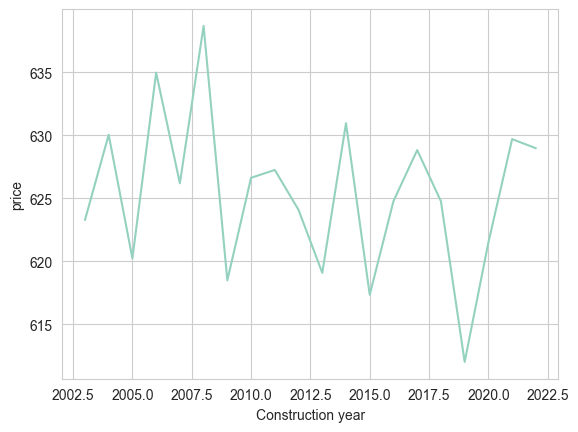

In [110]:
sns.lineplot(x= con_rel.index, y = con_rel['price'])

# 5.Top 10 Hosts by calculated host Listings count

In [112]:
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending = False).nlargest(10).to_frame()
hosts

,calculated host listings count
host name,
Sonder (NYC),155848.0
Blueground,76484.0
Karen,43291.0
Jeniffer,32789.0
Kara,27175.0
Sonder,19680.0
Kaz,18196.0
Ken,17668.0
Corporate Housing,16835.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Sonder (NYC)'),
  Text(1, 0, 'Blueground'),
  Text(2, 0, 'Karen'),
  Text(3, 0, 'Jeniffer'),
  Text(4, 0, 'Kara'),
  Text(5, 0, 'Sonder'),
  Text(6, 0, 'Kaz'),
  Text(7, 0, 'Ken'),
  Text(8, 0, 'Corporate Housing'),
  Text(9, 0, 'Jeremy & Laura')])

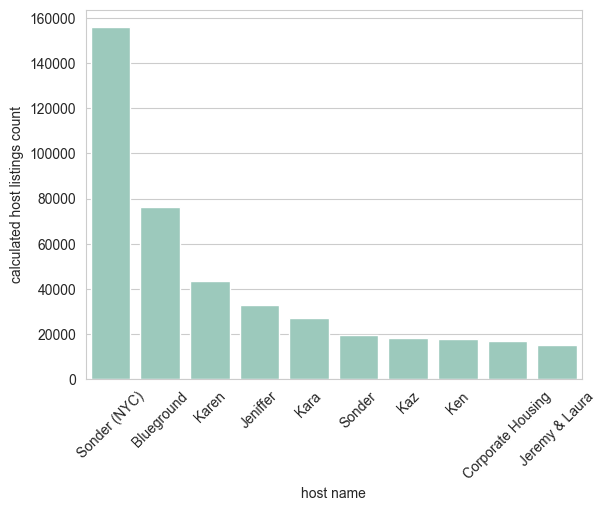

In [116]:
sns.barplot(x = hosts.index, y= hosts['calculated host listings count'])
plt.xticks(rotation = 45)

# 6.Are hosts with verified identities more likely to recieve positive reviews?

In [122]:
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending = False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.285641
unconfirmed,3.272033


## Hrere we can see that the reviews are not dependent on the fact weather the host identity is verified or not

# 7. Is there any correlation between the price of a listing and its service fee?